# Proyek Akhir: Memprediksi Risiko Dropout Mahasiswa Jaya Jaya Institut


- Nama: Adyan Pamungkas Ganefi Putra
- Email: adyanganefi@gmail.com
- Id Dicoding: adyanganefi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [9]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Save/load model
import joblib


### Menyiapkan data yang akan diguankan

#### Dataset yang digunakan tersedia pada link berikut:
https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv

In [8]:
# Load dataset
df = pd.read_csv("students_performance.csv")
df.head()


,Marital_status;Application_mode;Application_order;Course;Daytime_evening_attendance;Previous_qualification;Previous_qualification_grade;Nacionality;Mothers_qualification;Fathers_qualification;Mothers_occupation;Fathers_occupation;Admission_grade;Displaced;Educational_special_needs;Debtor;Tuition_fees_up_to_date;Gender;Scholarship_holder;Age_at_enrollment;International;Curricular_units_1st_sem_credited;Curricular_units_1st_sem_enrolled;Curricular_units_1st_sem_evaluations;Curricular_units_1st_sem_approved;Curricular_units_1st_sem_grade;Curricular_units_1st_sem_without_evaluations;Curricular_units_2nd_sem_credited;Curricular_units_2nd_sem_enrolled;Curricular_units_2nd_sem_evaluations;Curricular_units_2nd_sem_approved;Curricular_units_2nd_sem_grade;Curricular_units_2nd_sem_without_evaluations;Unemployment_rate;Inflation_rate;GDP;Status
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


## Data Understanding

In [10]:
# Melihat dimensi dataset dan informasi umum
print("Dimensi dataset:", df.shape)
print("\nInformasi tiap kolom:\n")
df.info()


Dimensi dataset: (4424, 1)

Informasi tiap kolom:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Memahami Struktur Awal Dataset

Dataset ini memiliki 4424 baris, namun hanya terdiri dari satu kolom yang panjang. Hal ini terjadi karena delimiter (pemisah antar kolom) dalam file kemungkinan bukan koma (`,`) melainkan titik koma (`;`), sehingga `pandas.read_csv()` tidak memecah kolom dengan benar secara default.

Selanjutnya, kita akan membaca ulang dataset menggunakan delimiter `;` untuk mendapatkan struktur kolom yang sesuai.


In [11]:
# Membaca ulang file dengan delimiter ';'
df = pd.read_csv('students_performance.csv', delimiter=';')

# Menampilkan 5 baris pertama untuk memastikan kolom sudah terbaca dengan benar
df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Membaca Ulang Dataset dengan Delimiter yang Sesuai

Setelah membaca ulang file dengan menggunakan delimiter `;`, struktur dataset kini sudah benar. Kolom-kolom sudah terpisah dan bisa diakses dengan lebih mudah untuk analisis selanjutnya.

Dengan struktur ini, kita bisa mulai melakukan eksplorasi data dan memahami karakteristik tiap fitur dalam dataset.


In [12]:
# Menampilkan informasi umum mengenai dataset
df.info()

# Statistik deskriptif untuk kolom numerik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Informasi Umum Dataset

Hasil dari `df.info()` menunjukkan bahwa dataset memiliki total **4424 baris** dan **37 kolom**. Semua kolom tidak memiliki nilai null, artinya tidak ada data yang hilang (missing values) sehingga tidak perlu melakukan penanganan missing values pada tahap awal ini.

Tipe data sebagian besar berupa `int64` dan `float64`, kecuali kolom `Status` yang bertipe `object` karena merupakan label kategori yang menjadi target klasifikasi.

---

### Statistik Deskriptif Kolom Numerik

Output `df.describe()` memberikan gambaran statistik seperti **mean**, **standard deviation**, **minimum**, dan **maximum** dari kolom-kolom numerik.

Beberapa insight awal:
- Kolom seperti `Application_mode`, `Course`, dan `Nacionality` tampak seperti angka tetapi sebenarnya merepresentasikan **kategori yang dikodekan sebagai angka**.
- Kolom `Admission_grade`, `Curricular_units_*_grade`, dan `Previous_qualification_grade` menunjukkan data dalam bentuk **skor/angka kontinu**, yang kemungkinan besar relevan untuk pemodelan.
- Kolom target `Status` belum dikonversi, namun karena tipenya `object`, kita bisa eksplorasi isinya selanjutnya.

Langkah berikutnya adalah mengeksplorasi kolom target `Status` untuk memahami jenis-jenis kelas yang akan diprediksi.


In [13]:
# Melihat nilai unik dan distribusinya pada kolom target
print("Nilai unik pada kolom Status:", df['Status'].unique())
print("\nDistribusi kelas:")
print(df['Status'].value_counts())

Nilai unik pada kolom Status: ['Dropout' 'Graduate' 'Enrolled']

Distribusi kelas:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


### Distribusi Kelas pada Kolom Target `Status`

Kolom `Status` adalah target yang akan diprediksi, dengan tiga kelas:
- **Graduate** (lulus): 2.209 data (50%)
- **Dropout** (berhenti): 1.421 data (32%)
- **Enrolled** (masih terdaftar): 794 data (18%)

Distribusi kelas tidak sepenuhnya seimbang, tetapi masih dalam batas wajar. Namun, kita perlu mempertimbangkan ini ketika melakukan pelatihan model, terutama untuk memastikan model tidak hanya mempelajari kelas mayoritas saja.


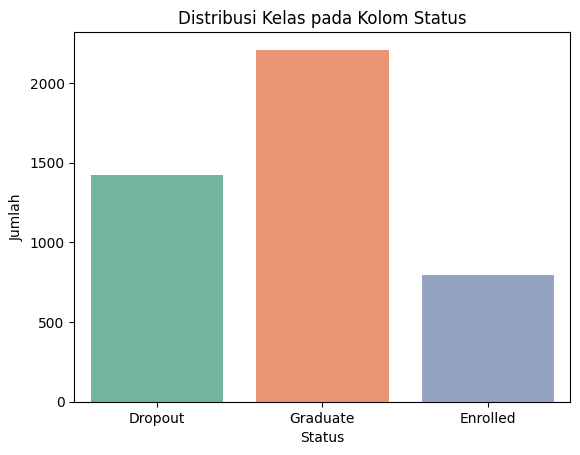

In [15]:
# Visualisasi distribusi kelas
sns.countplot(data=df, x='Status', hue='Status', palette='Set2', legend=False)
plt.title('Distribusi Kelas pada Kolom Status')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

## Data Preparation / Preprocessing

Melakukan encoding pada kolom Status agar bisa digunakan dalam model machine learning. Encoding ini akan mengubah label teks menjadi angka:

In [22]:
# Inisialisasi label encoder
le = LabelEncoder()

# Encode kolom 'Status'
df['Status'] = le.fit_transform(df['Status'])

# Tampilkan mapping label
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping label:", label_mapping)


Mapping label: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}


Memisahkan data menjadi:
- `X`: fitur (semua kolom kecuali `Status`)
- `y`: target (`Status`)


In [24]:
# Pisahkan fitur dan target
X = df.drop('Status', axis=1)
y = df['Status']


Membagi data menjadi data latih dan data uji:
- 80% data latih
- 20% data uji
- Gunakan `stratify=y` agar distribusi label seimbang


In [25]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data latih: 3539
Jumlah data uji: 885


Lakukan standarisasi pada fitur numerik menggunakan StandardScaler agar model bekerja lebih optimal:


In [26]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modeling

### Inisialisasi dan Pelatihan Model

Kita akan menggunakan algoritma Random Forest Classifier. Model ini cocok untuk klasifikasi multikelas dan tidak terlalu sensitif terhadap outlier atau skala fitur.


In [27]:
# Inisialisasi dan pelatihan model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

## Evaluation

### 1. Prediksi dan Evaluasi Model

Kita akan melakukan prediksi terhadap data uji, kemudian mengukur kinerja model menggunakan metrik:
- Akurasi
- Classification Report (precision, recall, f1-score)
- Confusion Matrix


In [28]:
# Prediksi terhadap data uji
y_pred = rf_model.predict(X_test_scaled)

# Evaluasi kinerja model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.7638418079096045

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       284
           1       0.56      0.35      0.43       159
           2       0.78      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885


Confusion Matrix:
 [[213  22  49]
 [ 40  56  63]
 [ 13  22 407]]


### 2. Interpretasi Hasil Evaluasi Model

Model Random Forest menunjukkan **akurasi sebesar 76.38%** pada data uji. Berikut adalah penjelasan metrik evaluasi:

#### a. Confusion Matrix
- **Baris 0 (Dropout)**: Dari 284 data Dropout, 213 berhasil diprediksi dengan benar, 22 salah sebagai Enrolled, dan 49 salah sebagai Graduate.
- **Baris 1 (Enrolled)**: Hanya 56 dari 159 Enrolled berhasil diprediksi benar. Sebagian besar (63) justru diprediksi sebagai Graduate.
- **Baris 2 (Graduate)**: Dari 442 Graduate, 407 berhasil diprediksi benar. Ini menunjukkan model sangat kuat dalam mengenali kelas Graduate.

#### b. Classification Report
- **Precision** adalah rasio prediksi benar dari semua prediksi pada kelas tersebut.
- **Recall** adalah rasio prediksi benar dari semua data sebenarnya pada kelas tersebut.
- **F1-score** adalah rata-rata harmonik precision dan recall.

Rangkuman:
- **Kelas 0 (Dropout)** memiliki precision dan recall cukup baik (~0.75).
- **Kelas 1 (Enrolled)** memiliki performa rendah, recall hanya 35%.
- **Kelas 2 (Graduate)** sangat baik dengan f1-score 0.85.

#### c. Macro vs Weighted Avg
- **Macro avg** menghitung rata-rata antar kelas secara seimbang.
- **Weighted avg** mempertimbangkan jumlah data per kelas saat menghitung rata-rata.

Kesimpulan:
- Model cukup baik secara keseluruhan.
- Perlu perbaikan dalam membedakan kelas `Enrolled`, mungkin dengan teknik balancing data atau tuning model.




### 3. Visualisasi Confusion Matrix

Agar lebih mudah memahami hasil prediksi model, berikut adalah visualisasi confusion matrix menggunakan heatmap dari Seaborn.


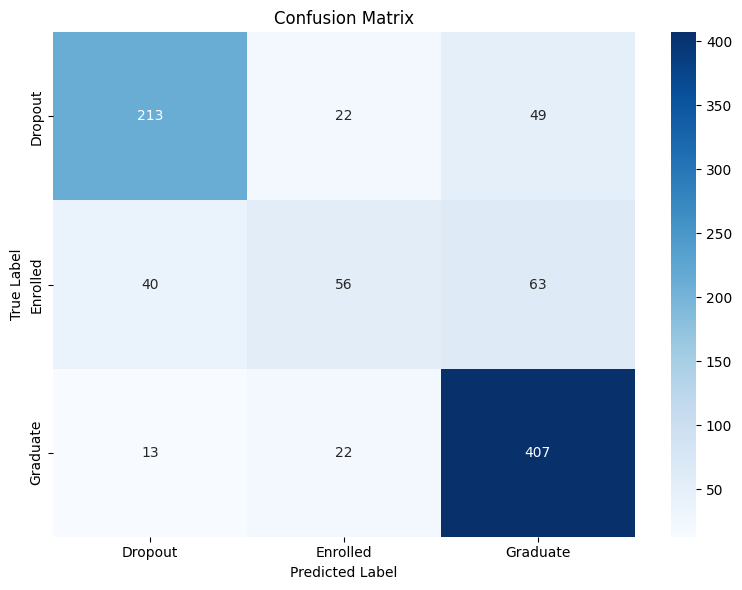

In [29]:
# Visualisasi Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Label untuk kelas (berdasarkan mapping yang kita buat sebelumnya)
labels = ['Dropout', 'Enrolled', 'Graduate']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


#### Analisis Confusion Matrix

Visualisasi confusion matrix menunjukkan performa model dalam memprediksi kelas target (`Status`: Dropout, Enrolled, Graduate).

- **Baris** = label asli (true label)
- **Kolom** = label hasil prediksi (predicted label)

Interpretasi:

- **Dropout (kelas 0)**: 213 diprediksi benar sebagai Dropout, 22 salah jadi Enrolled, 49 salah jadi Graduate.
- **Enrolled (kelas 1)**: hanya 56 prediksi benar; sisanya salah klasifikasi ke Dropout (40) atau Graduate (63).
- **Graduate (kelas 2)**: performa paling bagus, 407 dari 442 prediksi benar.

**Insight**:
- Model cukup akurat untuk kelas "Graduate" (kelas mayoritas).
- Perlu peningkatan untuk kelas "Enrolled" karena banyak salah diklasifikasikan, kemungkinan karena jumlah datanya lebih sedikit atau fitur belum cukup membedakan.


### 4. Menampilkan Feature Importance

Kita akan melihat fitur mana saja yang paling berkontribusi terhadap prediksi model Random Forest. Visualisasi ini membantu memahami faktor penting dalam menentukan status mahasiswa.

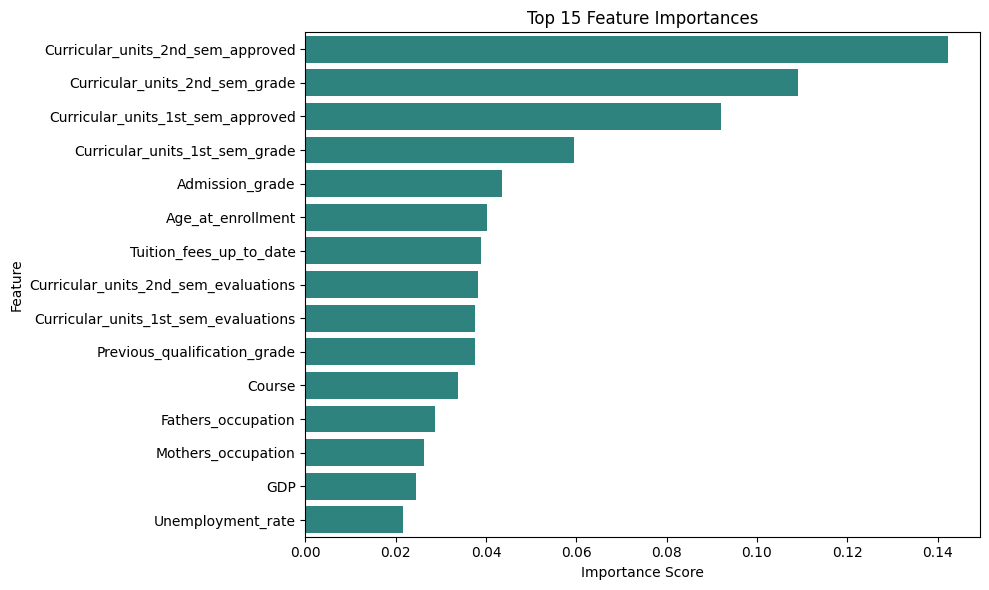

In [35]:
# Menampilkan feature importance
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Buat DataFrame sementara untuk menghindari warning palette
temp_df = pd.DataFrame({
    'Fitur': features[indices][:15],
    'Importance': importances[indices][:15],
    'Hue': [''] * 15  # hue dummy
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_df, x='Importance', y='Fitur', hue='Hue', palette='viridis', dodge=False)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()


Setelah melatih model `RandomForestClassifier`, kita dapat mengevaluasi fitur mana yang paling berkontribusi terhadap prediksi model menggunakan **Feature Importance**.

Pada visualisasi ini, ditampilkan 15 fitur teratas yang paling berpengaruh dalam model klasifikasi. Fitur-fitur ini diurutkan berdasarkan skor pentingnya (*importance score*) yang dihitung oleh algoritma Random Forest berdasarkan pengaruh terhadap keputusan pohon dalam hutan model.

Semakin tinggi nilai importance, semakin besar kontribusinya dalam menentukan output prediksi.

Visualisasi ini juga membantu dalam proses **feature selection** dan **interpretabilitas model**, serta berguna dalam pembuatan dashboard untuk menyoroti fitur-fitur penting yang relevan dengan hasil akhir mahasiswa (Dropout, Enrolled, Graduate).


## Menyimpan model

In [41]:
# --- 1. Simpan model Random Forest dan scaler ---
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# --- 2. Inisialisasi dan simpan LabelEncoder dengan kelas urutan manual ---
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Dropout', 'Enrolled', 'Graduate'])  # mapping manual
joblib.dump(label_encoder, 'label_encoder_status.pkl')

# --- 3. Ubah label numerik ke bentuk teks ---
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("Semua komponen berhasil disimpan: model, scaler, dan encoder")


Semua komponen berhasil disimpan: model, scaler, dan encoder


## Kesimpulan

Berdasarkan hasil eksplorasi, pemodelan, dan evaluasi terhadap dataset mahasiswa Jaya Jaya Institut, diperoleh beberapa kesimpulan utama sebagai berikut:

1. **Model yang digunakan**  
   Algoritma **Random Forest Classifier** dipilih karena mampu menangani klasifikasi multikelas, robust terhadap outlier, dan memberikan interpretasi melalui feature importance.

2. **Performa model**  
   Model menunjukkan **akurasi sebesar 76.38%** pada data uji, dengan performa terbaik dalam memprediksi mahasiswa yang **Graduate**, namun masih kurang dalam membedakan kelas **Enrolled**.

3. **Distribusi kelas**  
   - Graduate: 50%  
   - Dropout: 32%  
   - Enrolled: 18%  
   ➤ Distribusi ini cukup timpang, yang mungkin memengaruhi kinerja prediksi terutama pada kelas Enrolled yang minoritas.

4. **Fitur yang paling berpengaruh**  
   Berdasarkan *feature importance*, tiga fitur paling menentukan status akhir mahasiswa adalah:
   - `Curricular_units_2nd_sem_approved`
   - `Curricular_units_2nd_sem_grade`
   - `Curricular_units_1st_sem_approved`  
   ➤ Ini menekankan pentingnya performa akademik sejak awal perkuliahan sebagai indikator risiko dropout.

5. **Rekomendasi tindak lanjut**  
   - Lakukan **penyeimbangan data** untuk meningkatkan prediksi kelas minoritas seperti Enrolled.
   - Uji **model lain** seperti XGBoost atau Gradient Boosting untuk perbandingan performa.
   - Pertimbangkan pembuatan sistem **early warning** berdasarkan fitur penting agar institusi dapat mengintervensi lebih awal terhadap mahasiswa berisiko dropout.

---

Dengan memanfaatkan model ini, pihak kampus Jaya Jaya Institut dapat lebih **proaktif dalam mendeteksi mahasiswa yang berisiko tinggi untuk dropout**, berdasarkan performa akademik awal mereka. Hal ini dapat menjadi dasar penerapan kebijakan berbasis data guna **mengurangi angka dropout dan meningkatkan keberhasilan studi mahasiswa secara keseluruhan**.
